# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 9.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
181451,0.0293,0.0024,0.0024,0.0024,0.0024,0.0024,0.2539,0.0684,0.0024,0.0024,6,0,10,0
271827,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0049,0.0171,0.0024,0.0806,0,0,0,0
166809,0.0220,0.0610,0.3149,0.0024,0.0024,0.0146,0.7324,0.0293,0.0073,0.0586,9,9,8,8
117404,0.0439,0.5054,0.2881,0.0073,0.0415,0.5225,3.6450,0.1978,1.4868,0.7324,10,10,2,2
112729,0.0269,0.3784,0.1660,0.0024,0.0024,0.0757,0.1001,0.0366,0.7959,0.0024,0,0,0,0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461355 entries, 0 to 461354
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          461355 non-null  float64
 1   Emg2          461355 non-null  float64
 2   Emg3          461355 non-null  float64
 3   Emg4          461355 non-null  float64
 4   Emg5          461355 non-null  float64
 5   Emg6          461355 non-null  float64
 6   Emg7          461355 non-null  float64
 7   Emg8          461355 non-null  float64
 8   Emg9          461355 non-null  float64
 9   Emg10         461355 non-null  float64
 10  repetition    461355 non-null  int64  
 11  rerepetition  461355 non-null  int64  
 12  stimulus      461355 non-null  int64  
 13  restimulus    461355 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 49.3 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,461355.000000,461355.000000,461355.000000,461355.000000,461355.000000,461355.000000,461355.000000,461355.000000,461355.000000,461355.000000,461355.000000,461355.000000,461355.000000,461355.000000
mean,0.012592,0.063858,0.083643,0.019420,0.009869,0.067976,0.379264,0.189232,0.147708,0.108196,3.196580,2.265201,5.664542,4.039941
std,0.020043,0.171862,0.236912,0.058591,0.036540,0.169753,0.571609,0.326014,0.387663,0.189839,3.486926,3.265661,6.587632,6.156426
min,0.002400,0.000000,0.002400,0.002400,0.002400,0.000000,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.068400,0.041500,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000
50%,0.004900,0.002400,0.002400,0.002400,0.002400,0.026900,0.153800,0.083000,0.002400,0.031700,2.000000,0.000000,3.000000,0.000000
75%,0.019500,0.039100,0.041500,0.002400,0.002400,0.080600,0.444300,0.180700,0.073200,0.139200,6.000000,4.000000,10.000000,7.000000
max,1.301300,3.315400,4.660600,1.555200,1.225600,4.665500,4.665500,4.665500,4.663100,4.111300,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     193240
7      15521
4      15516
12     15515
2      15505
8      15498
6      15464
9      15458
11     15453
5      15451
10     15437
3      15432
1      15428
14     10339
13     10322
17     10322
15     10297
16     10266
18      5169
21      5166
19      5164
20      5134
22      5133
23      5125
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [13]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.372199,-0.39097,-0.377686,-0.322784,-0.222079,-0.391151,-0.529671,-0.472082,-0.40822,-0.212823
1,-0.490319,-0.39097,-0.377686,-0.322784,-0.222079,-0.391151,-0.525779,-0.472082,-0.40822,-0.224638
2,-0.372199,-0.39097,-0.377686,-0.322784,-0.159883,-0.391151,-0.533726,-0.478876,-0.40822,-0.224638
3,-0.490319,-0.39097,-0.377686,-0.322784,-0.222079,-0.391151,-0.545565,-0.492745,-0.40822,-0.212823
4,-0.372199,-0.39097,-0.368013,-0.322784,-0.159883,-0.391151,-0.545565,-0.499538,-0.40822,-0.212823
...,...,...,...,...,...,...,...,...,...,...
377799,-0.490319,-0.39097,-0.377686,-0.322784,-0.222079,-0.219772,-0.549619,-0.174882,-0.40822,-0.489020
377800,-0.490319,-0.39097,-0.377686,-0.322784,-0.222079,-0.154023,-0.565351,-0.236870,-0.40822,-0.417140
377801,-0.490319,-0.39097,-0.377686,-0.322784,-0.222079,-0.114681,-0.585136,-0.278478,-0.40822,-0.393016
377802,-0.490319,-0.39097,-0.377686,-0.322784,-0.222079,-0.088273,-0.596976,-0.299140,-0.40822,-0.417140


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ELU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [18]:
num_classes = 24
input_dim = X.shape[1]

In [19]:
visible = Input(shape=(input_dim,))
hidden1 = Dense(3000, activation='relu')(visible)
hidden2 = Dense(1500, activation='relu')(hidden1)
hidden3 = Dropout(0.2)(hidden2)
hidden4 = Dense(750, activation='relu')(hidden3)
hidden5 = Dense(375, activation='relu')(hidden4)
hidden6 = Dense(48, activation='relu')(hidden5)
output = Dense(num_classes, activation='softmax')(hidden6)
model = Model(inputs=visible, outputs=output)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 3000)              33000     
                                                                 
 dense_1 (Dense)             (None, 1500)              4501500   
                                                                 
 dropout (Dropout)           (None, 1500)              0         
                                                                 
 dense_2 (Dense)             (None, 750)               1125750   
                                                                 
 dense_3 (Dense)             (None, 375)               281625    
                                                                 
 dense_4 (Dense)             (None, 48)                18048 

# 2. Compile Network

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [23]:
history = model.fit(X_train, y_train, batch_size=4056, epochs=100, validation_data = (X_test, y_test))

Epoch 1/100
75/75 [==============================] - 3s 28ms/step - loss: 1.4159 - accuracy: 0.6257 - val_loss: 0.9824 - val_accuracy: 0.7252
Epoch 2/100
75/75 [==============================] - 2s 26ms/step - loss: 0.8591 - accuracy: 0.7538 - val_loss: 0.7572 - val_accuracy: 0.7855
Epoch 3/100
75/75 [==============================] - 2s 25ms/step - loss: 0.7270 - accuracy: 0.7886 - val_loss: 0.6561 - val_accuracy: 0.8053
Epoch 4/100
75/75 [==============================] - 2s 26ms/step - loss: 0.6549 - accuracy: 0.8059 - val_loss: 0.6147 - val_accuracy: 0.8172
Epoch 5/100
75/75 [==============================] - 2s 26ms/step - loss: 0.5965 - accuracy: 0.8201 - val_loss: 0.5562 - val_accuracy: 0.8318
Epoch 6/100
75/75 [==============================] - 2s 26ms/step - loss: 0.5594 - accuracy: 0.8305 - val_loss: 0.5384 - val_accuracy: 0.8362
Epoch 7/100
75/75 [==============================] - 2s 26ms/step - loss: 0.5318 - accuracy: 0.8375 - val_loss: 0.5116 - val_accuracy: 0.8441
Epoch 

75/75 [==============================] - 2s 27ms/step - loss: 0.2438 - accuracy: 0.9193 - val_loss: 0.2728 - val_accuracy: 0.9115
Epoch 59/100
75/75 [==============================] - 2s 26ms/step - loss: 0.2384 - accuracy: 0.9212 - val_loss: 0.2761 - val_accuracy: 0.9114
Epoch 60/100
75/75 [==============================] - 2s 26ms/step - loss: 0.2400 - accuracy: 0.9210 - val_loss: 0.2731 - val_accuracy: 0.9129
Epoch 61/100
75/75 [==============================] - 2s 27ms/step - loss: 0.2396 - accuracy: 0.9209 - val_loss: 0.2689 - val_accuracy: 0.9125
Epoch 62/100
75/75 [==============================] - 2s 26ms/step - loss: 0.2360 - accuracy: 0.9214 - val_loss: 0.2635 - val_accuracy: 0.9149
Epoch 63/100
75/75 [==============================] - 2s 26ms/step - loss: 0.2375 - accuracy: 0.9216 - val_loss: 0.2741 - val_accuracy: 0.9125
Epoch 64/100
75/75 [==============================] - 2s 27ms/step - loss: 0.2361 - accuracy: 0.9219 - val_loss: 0.2577 - val_accuracy: 0.9166
Epoch 65/100

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

Text(0.5, 1.0, 'Loss Curve of Deep Neural Netowork')

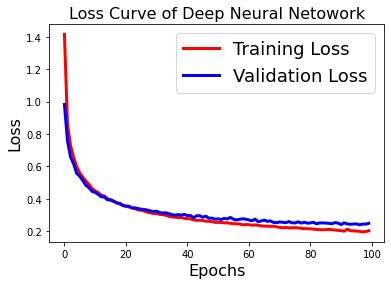

In [24]:
#Loss Curve


plt.plot(figsize = [8,6])

plt.plot(history.history['loss'],'r',linewidth = 3.0)
plt.plot(history.history['val_loss'],'b',linewidth = 3.0)

plt.legend(['Training Loss', 'Validation Loss'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)

plt.title('Loss Curve of Deep Neural Netowork' , fontsize = 16 )



Text(0.5, 1.0, 'Accuracy Curve of Deep Neural Netowork')

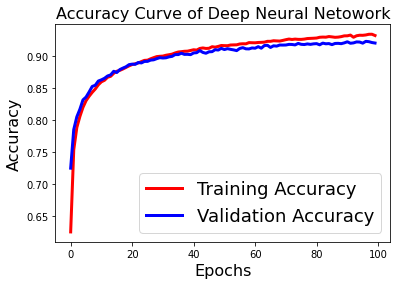

In [25]:
#Accuracy Curve

plt.plot(figsize = [8,6])
plt.plot(history.history['accuracy'],'r',linewidth = 3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth = 3.0)

plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)


plt.title('Accuracy Curve of Deep Neural Netowork' , fontsize = 16 )

##  4.2 Make Predictions

In [26]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)

In [27]:
predictions

array([13, 15,  7, ..., 17,  0,  0], dtype=int64)

#### Transforming from One Hot Encoding

In [28]:
y_test =np.argmax(y_test, axis=1)
y_test[1]

15

In [29]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, predictions)}
print(f"Accuracy is: {accuracy_score(y_test, predictions)* 100}")

Accuracy is: 92.05410198382764


## 4.3 Classification Report

Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     37852
           1       0.93      0.88      0.90      2147
           2       0.92      0.91      0.91      2223
           3       0.91      0.77      0.83      2239
           4       0.98      0.85      0.91      2138
           5       0.88      0.82      0.84      2250
           6       0.92      0.92      0.92      2274
           7       0.87      0.77      0.82      1844
           8       0.90      0.81      0.85      2300
           9       0.95      0.94      0.94      1903
          10       0.93      0.78      0.85      2427
          11       0.95      0.80      0.87      2212
          12       0.91      0.92      0.91      1986
          13       0.95      0.89      0.92      1466
          14       0.95      0.95      0.95      1275
          15       0.95      0.84      0.89      1474
          16       0.98      0.93      0.95      1566
 

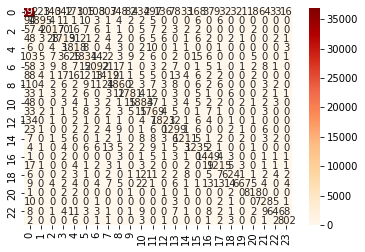

In [30]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, predictions))

cm = confusion_matrix(predictions, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

## 4.4 Evaluation

In [31]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.5806302192930215
MSE: 6.254483132833076
RMSE: 2.500896465836416


In [32]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, predictions, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, predictions,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, predictions,average='weighted'))

Precision Score :  0.9212090911407791
Recall Score :  0.9205410198382764
f1_score :  0.9192688357764018
